# Decentralized Consensus Detection

Descriptive text to be added

In [4]:
import math
import matplotlib
import matplotlib.pyplot as plt

from exp_decentralized_consensus import run_simulation

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## No Consensus Detection

Initial mean and standard deviation in agent values are (0.085, 10.345)
Final mean and standard deviation in agent values are (0.085, 0.000)
Total number of nodes travelled by all agents is 99906


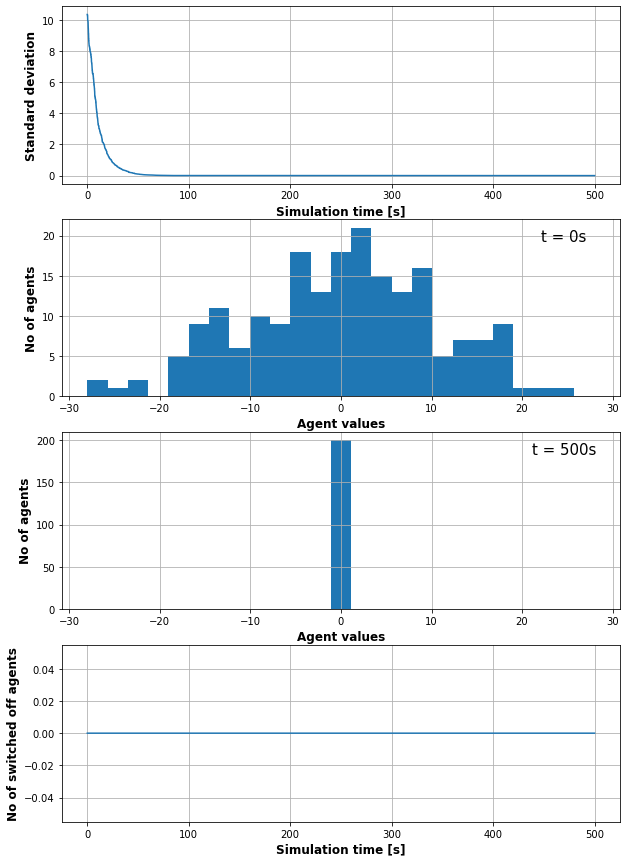

In [45]:
no_agents = 200
mu = 0 # average value
sigma = 10 # gaussian noise
graph_type = 'Gnp'
graph_size = 1000 # n
edge_probability = 0.5 # p
clock_rate = 1 # Poisson process for asynchronous agent actions
simulation_time = 500
parameter_type = 'single'
comm_limit = 1

# decentralized consensus detection parameters
off_percentage = 0.8 # abort simulation when off_percentage of all agents are off
shrink_factor = 1/100 # agent assumes convergence when delta val < sigma * shrink_factor
n_off = math.inf # agent switches off when having subsequently seen n_off other switched off agents
n_conv = math.inf # agent switches off when having subsequently seen n_conv agents with delta val < sigma * shrink_factor
switch_off = (off_percentage, shrink_factor, n_off, n_conv)

run_simulation(no_agents, graph_type, graph_size, edge_probability, mu, sigma, clock_rate, simulation_time, parameter_type, switch_off)

## Decentralized Consensus Detection - play with parameters

Initial mean and standard deviation in agent values are (-0.146, 9.660)
Final mean and standard deviation in agent values are (-0.146, 0.259)
Total number of nodes travelled by all agents is 13951


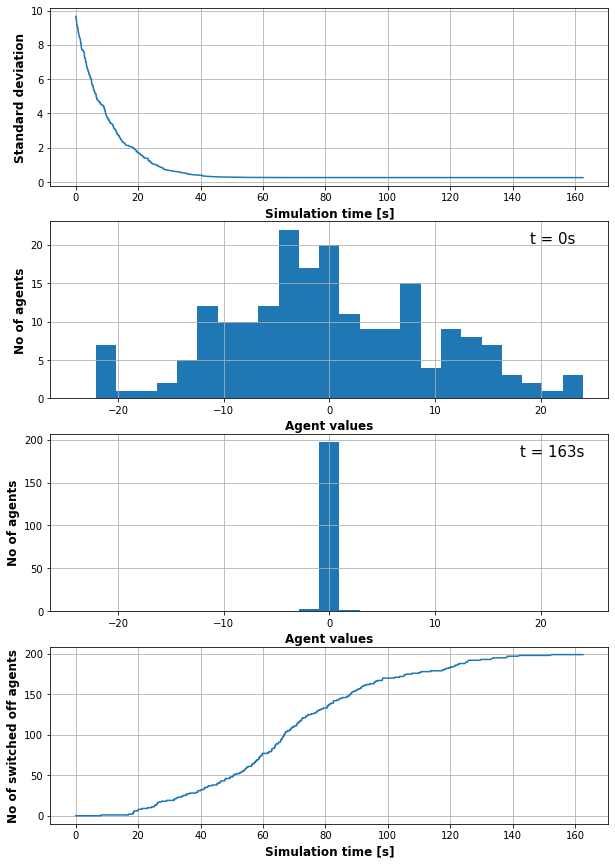

In [46]:
no_agents = 200
mu = 0 # average value
sigma = 10 # gaussian noise
graph_type = 'Gnp'
graph_size = 1000 # n
edge_probability = 0.5 # p
clock_rate = 1 # Poisson process for asynchronous agent actions
simulation_time = 500
parameter_type = 'single'
comm_limit = 1

# decentralized consensus detection parameters
off_percentage = 1 # abort simulation when off_percentage of all agents are off
shrink_factor = 1/100 # agent assumes convergence when delta val < sigma * shrink_factor
n_off = 5 # agent switches off when having subsequently seen n_off other switched off agents
n_conv = 5 # agent switches off when having subsequently seen n_conv agents with delta val < sigma * shrink_factor
switch_off = (off_percentage, shrink_factor, n_off, n_conv)

run_simulation(no_agents, graph_type, graph_size, edge_probability, mu, sigma, clock_rate, simulation_time, parameter_type, switch_off)

## Together

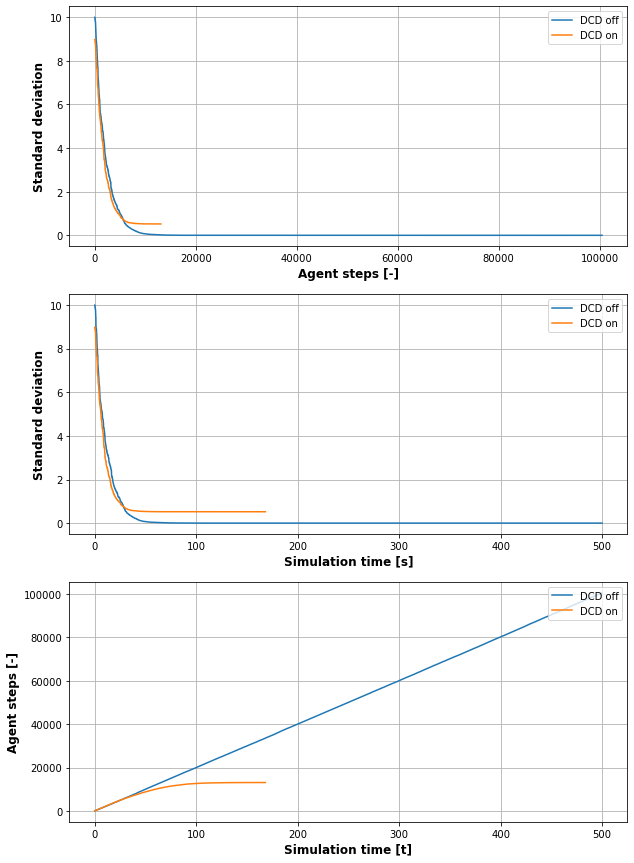

In [53]:
no_agents = 200
mu = 0 # average value
sigma = 10 # gaussian noise
graph_type = 'Gnp'
graph_size = 1000 # n
edge_probability = 0.5 # p
clock_rate = 1 # Poisson process for asynchronous agent actions
simulation_time = 500
parameter_type = 'sweep'
comm_limit = 1

fig, axs = plt.subplots(3, 1, figsize=(10,15))

# decentralized consensus detection parameters
off_percentage = 1 # abort simulation when off_percentage of all agents are off
shrink_factor = 1/100 # agent assumes convergence when delta val < sigma * shrink_factor
n_off = math.inf # agent switches off when having subsequently seen n_off other switched off agents
n_conv = math.inf # agent switches off when having subsequently seen n_conv agents with delta val < sigma * shrink_factor
switch_off = (off_percentage, shrink_factor, n_off, n_conv)

(std_rt_val, std_rt_t, step_count_rt) = run_simulation(no_agents, graph_type, graph_size, edge_probability, mu, sigma, clock_rate, simulation_time, parameter_type, switch_off)
axs[0].plot(step_count_rt, std_rt_val, label='DCD off')
axs[1].plot(std_rt_t, std_rt_val, label='DCD off')
axs[2].plot(std_rt_t, step_count_rt, label='DCD off')

n_off = 5 # agent switches off when having subsequently seen n_off other switched off agents
n_conv = 5 # agent switches off when having subsequently seen n_conv agents with delta val < sigma * shrink_factor
switch_off = (off_percentage, shrink_factor, n_off, n_conv)

# decentralized consensus detection ACTIVE
(std_rt_val, std_rt_t, step_count_rt) = run_simulation(no_agents, graph_type, graph_size, edge_probability, mu, sigma, clock_rate, simulation_time, parameter_type, switch_off)

# plot
axs[0].plot(step_count_rt, std_rt_val, label='DCD on')
axs[1].plot(std_rt_t, std_rt_val, label='DCD on')
axs[2].plot(std_rt_t, step_count_rt, label='DCD on')

axs[0].set_xlabel('Agent steps [-]', fontsize='large', fontweight='bold')
axs[0].set_ylabel('Standard deviation', fontsize='large', fontweight='bold')
axs[0].grid('k')
axs[0].legend(loc="upper right")

axs[1].set_xlabel('Simulation time [s]', fontsize='large', fontweight='bold')
axs[1].set_ylabel('Standard deviation', fontsize='large', fontweight='bold')
axs[1].grid('k')
axs[1].legend(loc="upper right")

axs[2].set_xlabel('Simulation time [t]', fontsize='large', fontweight='bold')
axs[2].set_ylabel('Agent steps [-]', fontsize='large', fontweight='bold')
axs[2].grid('k')
axs[2].legend(loc="upper right")